In [88]:
# A
# Getting started by importing all the required libraries both for visualization and the handling data
from pandasql import sqldf
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [89]:
# Importing the dataset to workspace
spares = pd.read_csv('Automobile_Spares.csv')

In [90]:
spares.head()

,order_number,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,payment_fee
0,N1,2021-06-01T00:00:00.000Z,North,Retail,Breaking system,9,19.29,173.61,Cash,0.00
1,N2,2021-06-01T00:00:00.000Z,North,Retail,Suspension & traction,8,32.93,263.45,Credit card,0.03
2,N3,2021-06-01T00:00:00.000Z,North,Wholesale,Frame & body,16,37.84,605.44,Transfer,0.01
3,N4,2021-06-01T00:00:00.000Z,North,Wholesale,Suspension & traction,40,37.37,1494.80,Transfer,0.01
4,N5,2021-06-01T00:00:00.000Z,North,Retail,Frame & body,6,45.44,272.61,Credit card,0.03


In [91]:
spares.shape

(1000, 10)

In [92]:
# Performing the Data Cleansing Operations
#  Checking for any null Values
spares.isnull()

,order_number,date,warehouse,client_type,product_line,quantity,unit_price,total,payment,payment_fee
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [93]:
spares.isnull().sum()

order_number    0
date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
payment_fee     0
dtype: int64

In [94]:
# Checking for any Duplicate Values
duplicate_rows = spares[spares.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [95]:
# Checking for any outliers
import pandas as pd

# Defining the numerical columns that we want to check for outliers
numerical_columns = ['quantity', 'unit_price', 'total']

# Calculating the summary statistics to identify the potential outliers
summary_statistics = spares[numerical_columns].describe()

# Calculate Interquartile Range (IQR) for each numerical column
Q1 = spares[numerical_columns].quantile(0.25)
Q3 = spares[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using IQR method
potential_outliers = spares[
    (spares[numerical_columns] < (Q1 - 1.5 * IQR)) |
    (spares[numerical_columns] > (Q3 + 1.5 * IQR))
]

# Print potential outliers
if not potential_outliers.empty:
    print("Potential outliers found:")
    print(potential_outliers)
else:
    print("No potential outliers found.")

Potential outliers found:
    order_number date warehouse client_type product_line  quantity  \
0            NaN  NaN       NaN         NaN          NaN       NaN   
1            NaN  NaN       NaN         NaN          NaN       NaN   
2            NaN  NaN       NaN         NaN          NaN       NaN   
3            NaN  NaN       NaN         NaN          NaN      40.0   
4            NaN  NaN       NaN         NaN          NaN       NaN   
..           ...  ...       ...         ...          ...       ...   
995          NaN  NaN       NaN         NaN          NaN       NaN   
996          NaN  NaN       NaN         NaN          NaN      32.0   
997          NaN  NaN       NaN         NaN          NaN       NaN   
998          NaN  NaN       NaN         NaN          NaN      32.0   
999          NaN  NaN       NaN         NaN          NaN       NaN   

     unit_price    total payment  payment_fee  
0           NaN      NaN     NaN          NaN  
1           NaN      NaN     NaN     

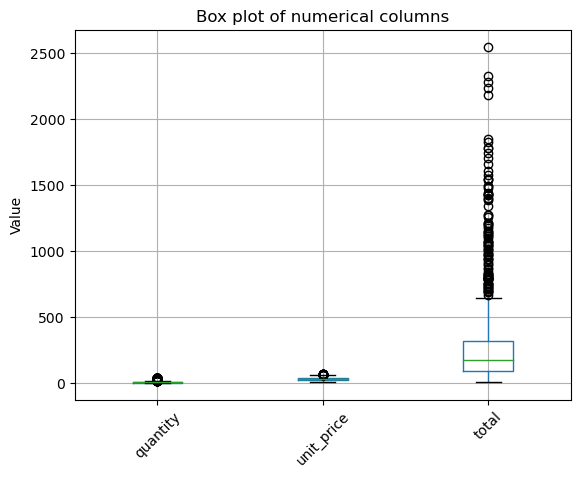

In [96]:
# Visualizing the potential outliers using box plots
import matplotlib.pyplot as plt

# Creating the box plots for numerical columns
spares[numerical_columns].boxplot()
plt.title("Box plot of numerical columns")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b> Analysing the Dataset Characteristics</b> </span>

In [97]:
# Checking the date range of the dataset
print(spares.date.min(), spares.date.max())

2021-06-01T00:00:00.000Z 2021-08-28T00:00:00.000Z


In [98]:
# Checking the different types of the warehouses
spares.warehouse.unique()

array(['North', 'Central', 'West'], dtype=object)

In [99]:
# Checking the different types of the clients
spares.client_type.unique()

array(['Retail', 'Wholesale'], dtype=object)

In [100]:
# Checking the broad classificatin of the spare
spares.product_line.unique()

array(['Breaking system', 'Suspension & traction', 'Frame & body',
       'Miscellaneous', 'Electrical system', 'Engine'], dtype=object)

In [101]:
# Checking the range of units in transaction
print(spares.quantity.min(), spares.quantity.max())

1 40


In [102]:
# Checking the data range of a single unit price
print(spares.unit_price.min(), spares.unit_price.max())

10.03 66.62


In [103]:
# Checking the data range for revenue generated by the sales
print(spares.total.min(), spares.total.max())

10.35 2546.33


In [104]:
# Checking the different types of the payment methods
spares.payment.unique()

array(['Cash', 'Credit card', 'Transfer'], dtype=object)

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Preliminary Notes After Analysing the Dataset</b> </span>

<p>1. It is clearly shown that we just have the date range of 3 months which is obvious that the this is not suitable or sufficient to draw long term conclusions.<br>2. I see that I have a significant amount of data—1000 rows. However, if the data is segmented by warehouse or product line, there might not be an adequate dataset for each category to support valid conclusions.<br>3. I see that there are some qualitative data points in a few of the columns, which I can "groupby" later on in my analysis.<br>4. Quantitative data in several columns, which I can sort into bins for frequency analysis or use for calculations later in my study, is something I should take note of.<br>5. Lastly, I would like to warn you that there is a wide range in the unit pricing between 10 and 60 dollars. This is a crucial point to take into account when I come to conclusions regarding sales later in my study.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.1. How much was sold overall using each method of payment?</b> </span>
<p>My goal in this section was to respond to my father's query. To display the outcome, I use a simple groupby and horizontal bar chart to draw effective conclusions for this question.</p>

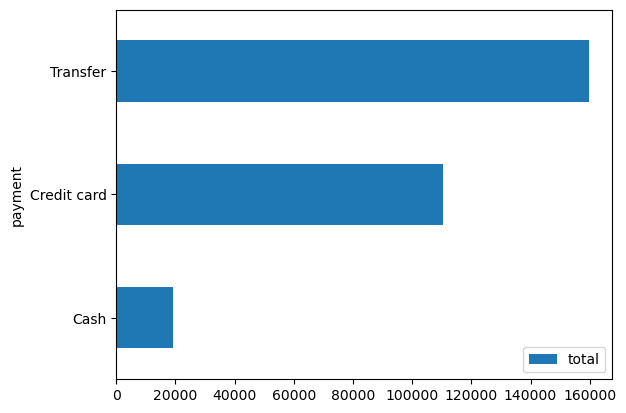


The ratio of the products sold via transfer and cash is 8.315094457552698



,total
payment,
Cash,19199.10
Credit card,110271.57
Transfer,159642.33


In [105]:
# Calculating the relations between each payment methods in terms of ratios and presenting my findings in the form of tables and bar charts.

payment_method = spares.groupby('payment')[['total']].sum()
payment_method = payment_method.sort_values('total', ascending = True)
payment_method.plot(kind = 'barh')
plt.show()

ratio = payment_method.iloc[2,0]/payment_method.iloc[0,0]
print('\nThe ratio of the products sold via transfer and cash is {}\n'.format(ratio))
payment_method

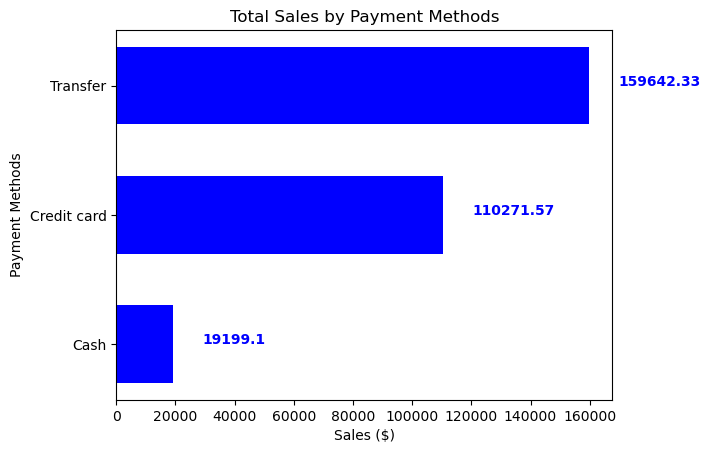

In [106]:
#visualisation

sales_method = payment_method.total.values.tolist()
payment_methods = ['Cash','Credit card', 'Transfer']

fig, ax = plt.subplots()    
ind = np.arange(len(sales_method))  # the y locations for each payment method
ax.barh(ind, sales_method, 0.6, color="blue")  # 0.6 is the width of bar
ax.set_yticks(ind)
ax.set_yticklabels(payment_methods, minor=False)
plt.title('Total Sales by Payment Methods')
plt.ylabel('Payment Methods')
plt.xlabel('Sales ($)')      

for index, value in enumerate(sales_method):
    ax.text(value + 10000, index, str(round(value,2)), color='blue', fontweight='bold')
plt.show()

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>The majority of sales are transfer payments, with cash being the least preferred mode of payment. Sales of transfers are more than eight times higher than sales of cash. To find out why, the data must be examined in more detail.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.2. What is each product line's average unit price?</b></span>
<p>I respond to my father's second query in this section by going through the same procedure again, visualising the outcome with a horizontal bar chart and groupby.</p>

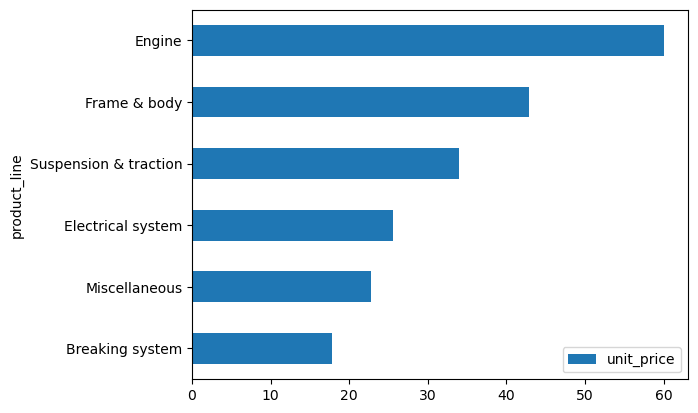


 The average unit cost of an engine compared to a breaking system is 3.387262458360707



,unit_price
product_line,
Breaking system,17.740522
Miscellaneous,22.810738
Electrical system,25.585130
Suspension & traction,33.969868
Frame & body,42.832229
Engine,60.091803


In [107]:
# Calculating the relations between each payment methods in terms of ratios and presenting my findings in the form of tables and bar charts.
avg_unit_price = spares.groupby('product_line')[['unit_price']].mean()
avg_unit_price = avg_unit_price.sort_values(['unit_price'],ascending = True)
avg_unit_price.plot(kind = 'barh')
plt.show()

ratio = avg_unit_price.iloc[5,0]/avg_unit_price.iloc[0,0]
print('\n The average unit cost of an engine compared to a breaking system is {}\n'.format(ratio))
avg_unit_price

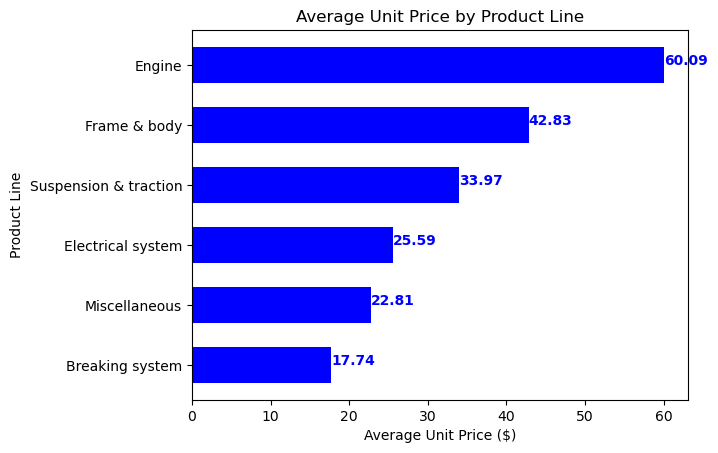

In [108]:
#VVisualization
x = avg_unit_price.unit_price.values.tolist()
y = ['Breaking system', 'Miscellaneous', 'Electrical system', 'Suspension & traction', 'Frame & body', 'Engine']

fig, ax = plt.subplots()
ind = np.arange(len(y))  # the y locations for each product line
ax.barh(ind, x, 0.6, color="blue")  # 0.6 is the width of bar
ax.set_yticks(ind)
ax.set_yticklabels(y, minor=False)
plt.title('Average Unit Price by Product Line')
plt.ylabel('Product Line')
plt.xlabel('Average Unit Price ($)')

for index, value in enumerate(x):
    ax.text(value, index, str(round(value, 2)), color='blue', fontweight='bold')

plt.show()

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>Breaking systems are the least expensive per unit on average, while engines are the most expensive—more than three times as much. Mid-range components include the body and suspension, traction and electrical systems. When comparing the total sales of engines and breaking systems, this is a crucial consideration to make later on.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.3. Which client types have the highest and lowest average sales?</b></span>
<p>I am beginning to wonder what the differences between totals and averages are all about, and I wonder what I will discover if I use this method for every category. In this part, I begin by listing the average and total sales by customer type.</p>

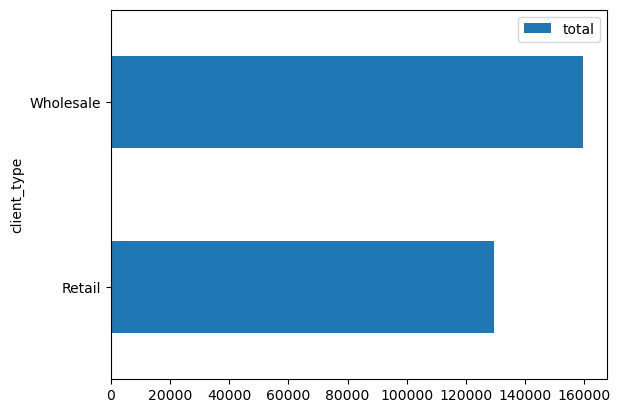


The ratio of total wholesale sales to retail sales is 1.23



,total
client_type,
Retail,129470.67
Wholesale,159642.33


In [109]:
# Calculating the relations between each payment methods in terms of ratios and presenting my findings in the form of tables and bar charts.

total_sales_by_client_category = spares.groupby('client_type')[['total']].sum()
total_sales_by_client_category = total_sales_by_client_category.sort_values('total',ascending = True)
total_sales_by_client_category.plot(kind = 'barh')
plt.show()
ratio = total_sales_by_client_category.iloc[1,0]/total_sales_by_client_category.iloc[0,0]
print('\nThe ratio of total wholesale sales to retail sales is {}\n'.format(round(ratio,2)))
total_sales_by_client_category

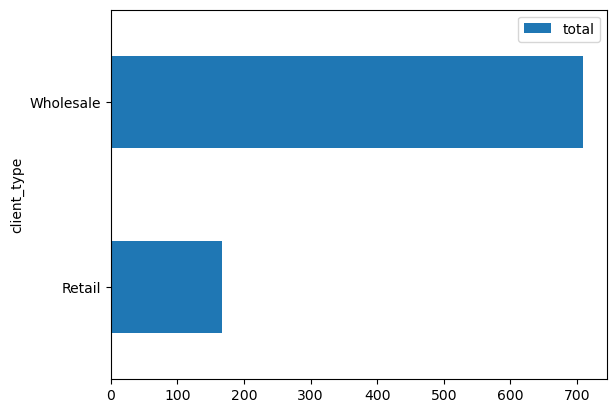


The typical ratio of wholesale sales to retail sales is 4.25



,total
client_type,
Retail,167.058929
Wholesale,709.521467


In [110]:
# Calculating the relations between each payment methods in terms of ratios and presenting my findings in the form of tables and bar charts.

avg_sales_by_client_category = spares.groupby('client_type')[['total']].mean()
avg_sales_by_client_category = avg_sales_by_client_category.sort_values('total',ascending = True)
avg_sales_by_client_category.plot(kind = 'barh')
plt.show()
ratio = avg_sales_by_client_category.iloc[1,0]/avg_sales_by_client_category.iloc[0,0]
print('\nThe typical ratio of wholesale sales to retail sales is {}\n'.format(round(ratio,2)))
avg_sales_by_client_category

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>The average wholesale sales volume exceeds the retail order volume by a factor of four. But wholesale only accounts for 23% of overall sales volume compared to retail. This raises two potential outcomes. First, as a source of strong sales growth, retail sales may surpass wholesale sales. Secondly, it is plausible that wholesale is not receiving enough attention and is not reaching its full potential. To determine the more likely option, further data must be examined.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.4. Which warehouse has the highest average and total sales?</b></span>
<p>I'm now investigating overall sales and average sales based on warehouse.</p>

In [111]:
# Calculating the relations between each payment methods in terms of ratios and presenting my findings in the form of tables and bar charts.

total_sales_warehouse = spares.groupby('warehouse')[['total']].sum()
total_sales_warehouse = total_sales_warehouse.sort_values('total',ascending = True)
total_sales_warehouse.plot(kind = 'barh')
plt.show()
ratio = total_sales_warehouse.iloc[2,0]/total_sales_warehouse.iloc[0,0]
print('\nThe central warehouse's overall sales ratio to the west warehouse's is {}\n'.format(round(ratio,2)))
total_sales_warehouse

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2517257815.py, line 8)

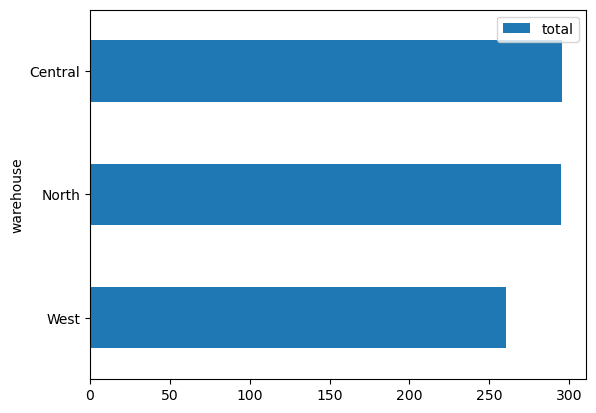

,total
warehouse,
West,260.702722
North,294.716559
Central,295.797667


In [112]:
#visualisation

avg_sales_warehouse = spares.groupby('warehouse')[['total']].mean()
avg_sales_warehouse = avg_sales_warehouse.sort_values('total',ascending = True)
avg_sales_warehouse.plot(kind = 'barh')
plt.show()
avg_sales_warehouse

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>Although the average sales for each warehouse are almost equal, the central warehouse's overall sales are three times higher than those of the west warehouse. It's feasible to increase the quantity of orders coming from the West warehouse. To validate this suggestion, a more thorough examination of the breakdown of order types will be required.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.5. Which product lines have the highest and lowest average sales?</b></span>
<p>I then look at total sales and average sales according to product line. I remember that each product line has a separate unit price, so this is where things start to get interesting. I wonder if I'll be surprised by the outcomes.</p>

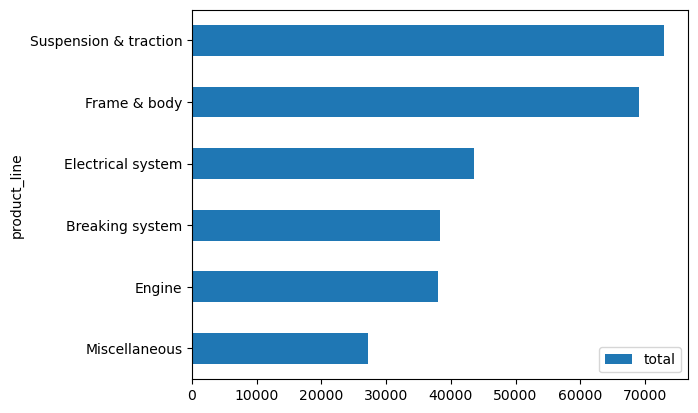


Total sales of suspension and traction divided by miscellaneous sales are 2.6877233965328493



,total
product_line,
Miscellaneous,27165.82
Engine,37945.38
Breaking system,38350.15
Electrical system,43612.71
Frame & body,69024.73
Suspension & traction,73014.21


In [113]:
# Calculating the relations between each payment methods in terms of ratios and presenting my findings in the form of tables and bar charts.

total_sales_product_line = spares.groupby('product_line')[['total']].sum()
total_sales_product_line = total_sales_product_line.sort_values('total',ascending = True)
total_sales_product_line.plot(kind = 'barh')
plt.show()
ratio = total_sales_product_line.iloc[5,0]/total_sales_product_line.iloc[0,0]
print('\nTotal sales of suspension and traction divided by miscellaneous sales are {}\n'.format(ratio))
total_sales_product_line

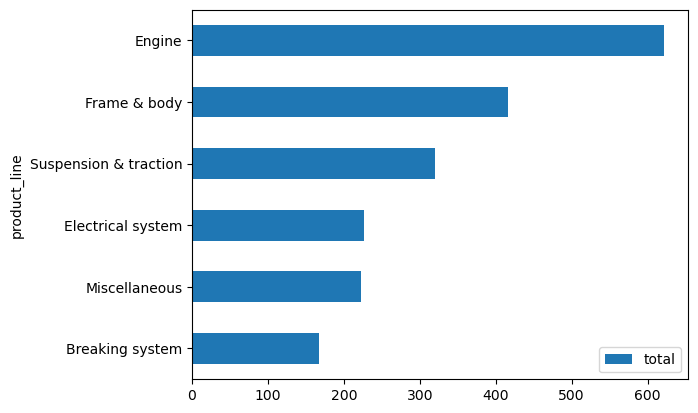

,total
product_line,
Breaking system,166.739783
Miscellaneous,222.670656
Electrical system,225.972591
Suspension & traction,320.237763
Frame & body,415.811627
Engine,622.055410


In [114]:
#visualisation

avg_sales_product_line = spares.groupby('product_line')[['total']].mean()
avg_sales_product_line = avg_sales_product_line.sort_values('total',ascending = True)
avg_sales_product_line.plot(kind = 'barh')
plt.show()
avg_sales_product_line

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>The unit pricing by product line and average sales by product line are in agreement. However, total sales by product line show that frame and body and suspension and traction goods are in the highest demand at current time. To validate this pattern, further data over a longer time period would need to be gathered, as the data only covers June to August 2021. If verified, there needs to be assurance that these product lines' supply can keep up with the demand. Later on, it could be helpful to investigate the quantity ordered per product line, paying particular attention to engines, frame and body, and suspension and traction.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.6. Does the sort of client and the mode of payment have a relationship?</b></span>
<p>In responding to the payment methods query, I considered their possible causes. I examine the relationship between client type and payment method in this part.</p>

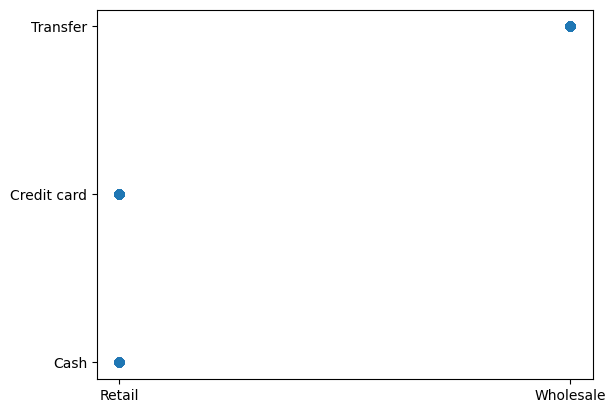


The ratio of cash payments to credit card payments is 5.68



count
client_type payment           
Retail      Cash           116
            Credit card    659
Wholesale   Transfer       225

In [115]:
#Employing a scatter plot and a frequency table to investigate the association between client type and payment method
#Finding a ratio for frequency comparison

plt.scatter(spares.client_type.values.tolist(), spares.payment.values.tolist())
plt.show()
frequency = spares.groupby(['client_type','payment'])[['date']].count()
frequency = frequency.rename (columns = {'date':'count'})
ratio = frequency.iloc[1,0]/frequency.iloc[0,0]
print('\nThe ratio of cash payments to credit card payments is {}\n'.format(round(ratio,2)))
frequency

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>Transfer payments are always used for wholesale orders. Payment for retail orders is always made using a credit card or cash; credit cards are used for orders more than five times as frequently as cash. Since using a credit card is the preferred option, the business may want to consider forming partnerships with more credit card companies.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.7. Explore the quantity frequency distribution, filtered by product line.?</b></span>
<p>Based on my initial investigation, I discovered that the quantity per order varies between 1 and 40. Given the wide range, I'm curious in the distribution and the modal quantity per order. In this section, I will investigate the quantity per order distribution using histograms. I will also draw distinct histograms for each product line for comparison, as I believe that amount varies depending on the product line.</p>


In [116]:
#displaying the average number ordered, broken out per product line

spares_mean = pd.pivot_table(spares,index = 'product_line',aggfunc = {'quantity':np.mean})
spares_mean


,quantity
product_line,
Breaking system,9.260870
Electrical system,8.797927
Engine,10.278689
Frame & body,9.753012
Miscellaneous,9.639344
Suspension & traction,9.407895


<p>I observe that for each product line, the average amount per order is often around nine. It's interesting to see that Engine, the produce line with the highest cost, also has the highest average quantity ordered. As benchmark values for future comparisons, these average values are helpful.</p>

In [117]:
#displaying the entire amount ordered, grouped per product line

spares_sum = pd.pivot_table(spares,index = 'product_line',aggfunc = {'quantity':np.sum})
spares_sum = spares_sum.sort_values('quantity',ascending = True)
ratio = spares_sum.iloc[5,0]/spares_sum.iloc[0,0]
print('\nThe suspension and traction order quantity to engine ratio is {}\n'.format(ratio))
spares_sum


The suspension and traction order quantity to engine ratio is 3.4210526315789473



,quantity
product_line,
Engine,627
Miscellaneous,1176
Frame & body,1619
Electrical system,1698
Breaking system,2130
Suspension & traction,2145


<p>I make a warning. Engines used to have the most quantity per order. Nonetheless, engine has the lowest total amount sold.</p>

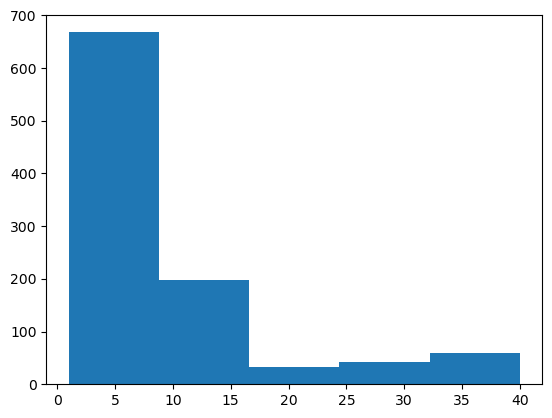

In [118]:
#displaying the quantity per order's overall frequency distribution in five bins on a histogram

plt.hist(spares.quantity, bins = 5)
plt.show()

<p>The majority of orders are smaller than 10, a considerable percentage are smaller than 15, and orders rarely exceed 15.</p>

Breaking system


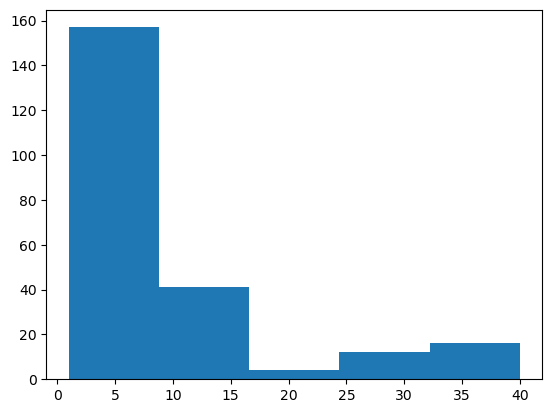

Suspension & traction


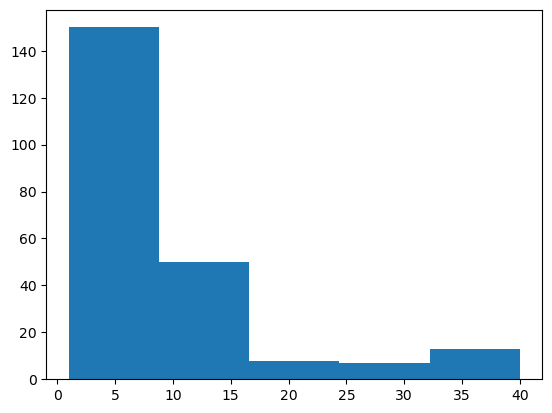

Frame & body


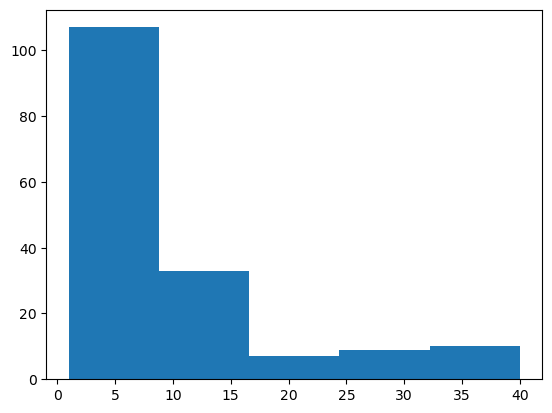

Miscellaneous


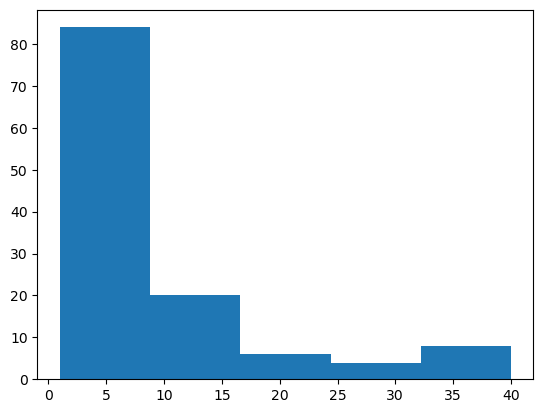

Electrical system


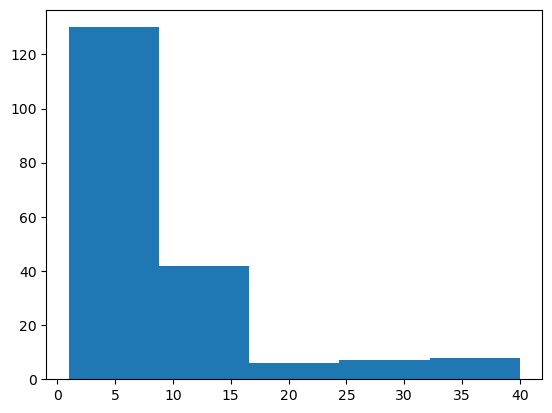

Engine


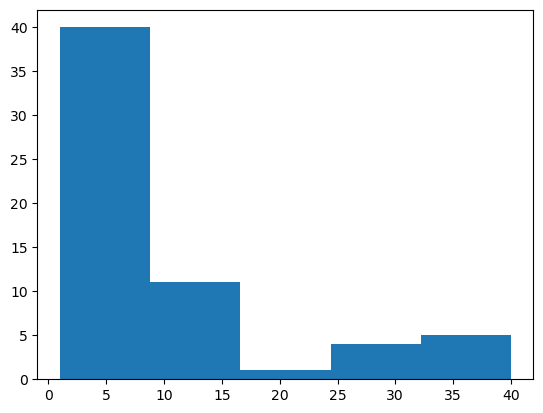

In [119]:
#Plotting a histogram for every product line and its order amount distribution using a for loop with five bins

for item in spares.product_line.unique().tolist():
    print(item)
    plt.hist(spares[spares['product_line'] == item].quantity, bins = 5)
    plt.show()

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>I've seen that the engine and the frame and body, which are the most costly sections, sell the fewest units overall. With more than three times as many orders for suspension and traction as there are for engines, this product line is the one with the highest sales volume. This makes me wonder if quantity and unit price, both across and within product lines, significantly correlate. We will investigate this question later.</p><p>There are no noteworthy trends or substantial abnormalities in the quantity of orders for any product line; rather, the distribution of orders for each product line is identical to the distribution of orders for all product lines.</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Q.8. Show and describe how sales have changed based on the product line and warehouse?</b></span>
<p>I want to see which product line and warehouse are doing the best or worst in terms of sales and quantity per order in this section. In addition, I want to find out if unit price matters.</p>

In [120]:
#To see the sales breakdown, sort the pivot table by product line and warehouse.

spares_sales = pd.pivot_table(spares, index = ['warehouse','product_line'])
spares_sales

C:\Users\Srira\AppData\Local\Temp\ipykernel_2376\3152120048.py:3: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  spares_sales = pd.pivot_table(spares, index = ['warehouse','product_line'])


payment_fee   quantity       total  \
warehouse product_line                                                
Central   Breaking system           0.022946   9.142857  158.861875   
          Electrical system         0.021648   9.208791  241.698462   
          Engine                    0.021389  12.472222  757.309444   
          Frame & body              0.023205   8.948718  385.135385   
          Miscellaneous             0.020517   9.275862  210.704828   
          Suspension & traction     0.023238   9.333333  311.154381   
North     Breaking system           0.021549   8.521127  149.128592   
          Electrical system         0.022121   9.196970  231.019242   
          Engine                    0.023750   7.625000  452.295625   
          Frame & body              0.020508  11.440678  481.319661   
          Miscellaneous             0.021053   9.973684  226.807105   
          Suspension & traction     0.022111   9.622222  334.610778   
West      Breaking system           0.020213  10.659574  212.116809   
          Electrical system         0.024444   7.027778  176.968889   
          Engine                    0.026667   6.222222  382.834444   
          Frame & body              0.021724   8.482759  365.045172   
          Miscellaneous             0.020385   9.961538  243.318077   
          Suspension & traction     0.020303   9.060606  309.940303   

                                 unit_price  
warehouse product_line                       
Central   Breaking system         17.499107  
          Electrical system       25.723297  
          Engine                  60.058889  
          Frame & body            42.737949  
          Miscellaneous           22.725690  
          Suspension & traction   33.649619  
North     Breaking system         17.462394  
          Electrical system       25.525758  
          Engine                  59.125625  
          Frame & body            42.602373  
          Miscellaneous           22.938684  
          Suspension & traction   34.039556  
West      Breaking system         18.735957  
          Electrical system       25.344722  
          Engine                  61.941111  
          Frame & body            43.553448  
          Miscellaneous           22.813462  
          Suspension & traction   34.798788

<p>The quantity for Engine is what immediately jumps out at me. However, the amount of numbers is excessive, and I require a visual aid.</p>

Fig 1: Quantity


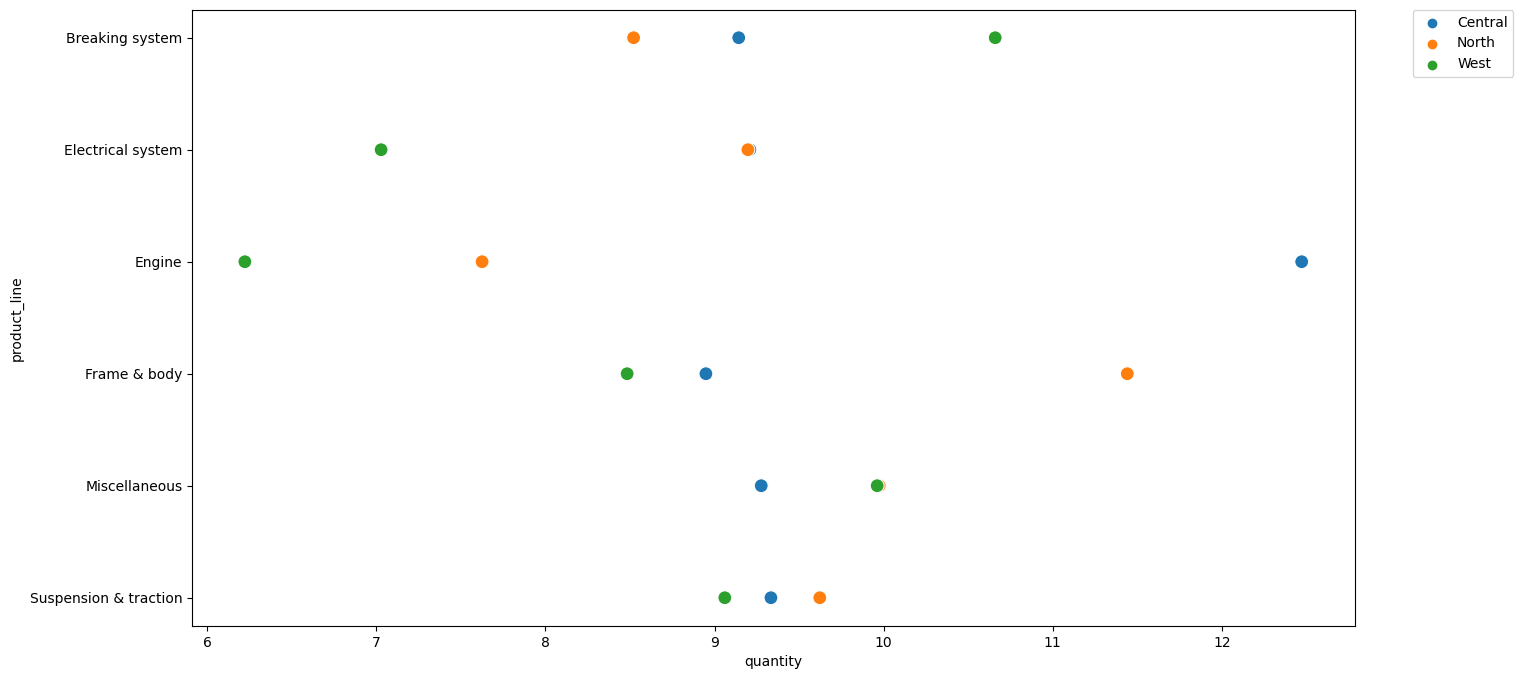

In [121]:
#amount per order broken down by warehouse and product category

print('Fig 1: Quantity')
plt.figure(figsize=(15,8))
sns.scatterplot(x='quantity',y='product_line',hue='warehouse',data=spares_sales,s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

<p>The green dots (West) are generally trailing, as I can see. Additionally, I see two green dots (West) on the far left and a blue dot (Central) and an orange dot (North) on the far right.</p>

Fig 2: Unit Price


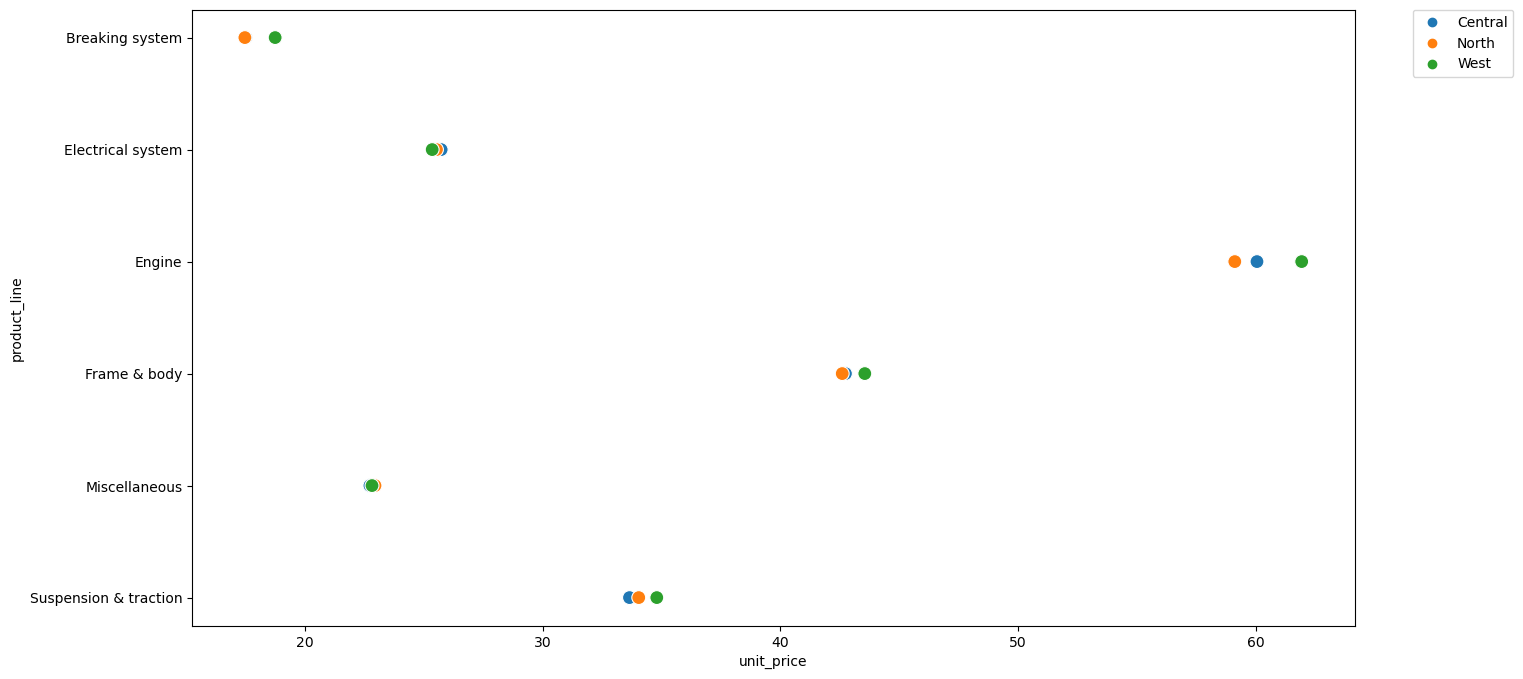

In [122]:
#unit cost broken down by warehouse and product line

print('Fig 2: Unit Price')
plt.figure(figsize=(15,8))
sns.scatterplot(x='unit_price',y='product_line',hue='warehouse',data=spares_sales,s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

<p>The dots appear to be grouped together, I observe. It looks like green dots are in the lead this time.</p>

Fig 3: Sales


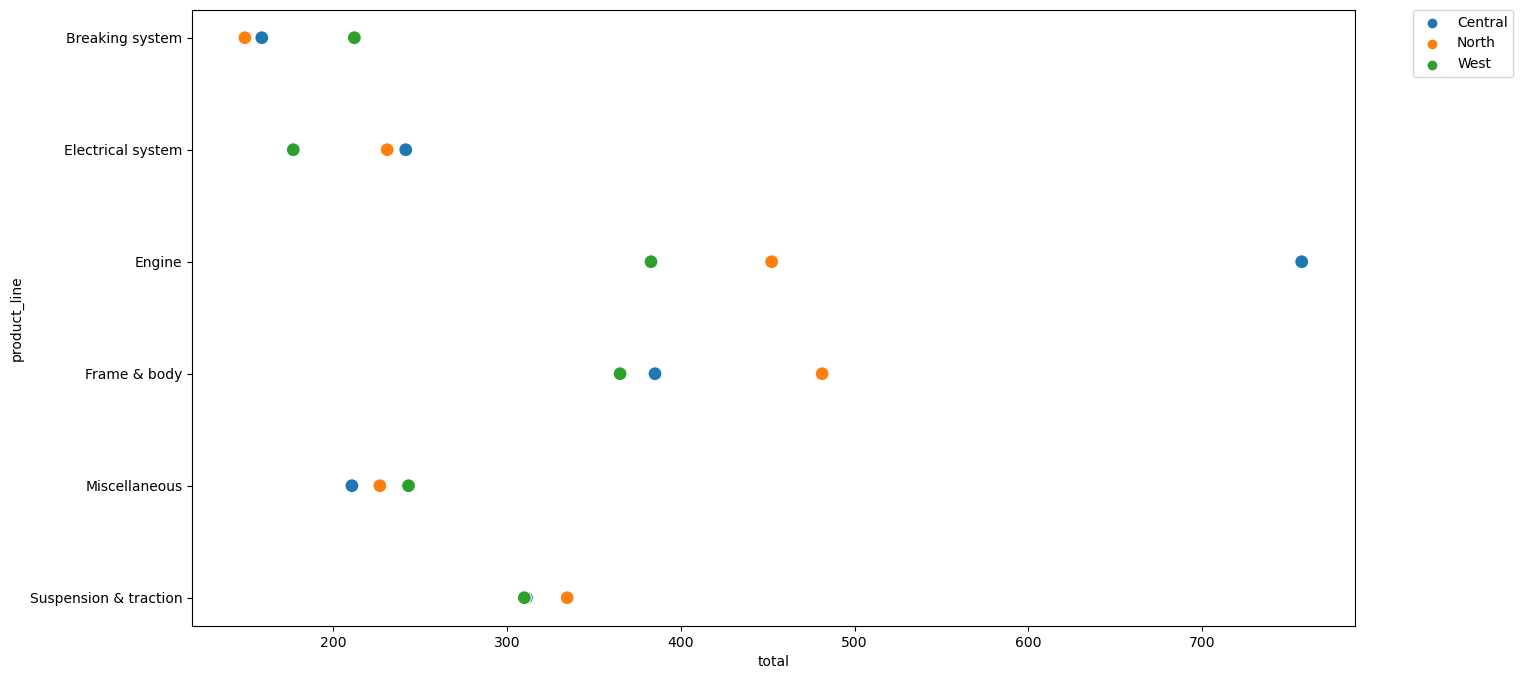

In [123]:
#total sales divided by warehouse and product line

print('Fig 3: Sales')
plt.figure(figsize=(15,8))
sns.scatterplot(x='total',y='product_line',hue='warehouse',data=spares_sales,s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

<p>The distances between the dots are not too great. In the extreme right corner, I spot a lone blue dot (Central).</p>

<span style="font-size: 13pt; color: #000099; background-color: #FFFFCC"><b>Conclusion:</b></span>
<p>As can be seen in Fig. 2, the West warehouse has the highest average unit prices across 4 of the 6 product lines. Each product line's three warehouses are closely grouped together, therefore there is little variation in the unit prices.</p>
<p>As seen in Fig. 1, the West warehouse has the lowest average order sizes across 4 of the 6 product lines. In terms of engines and electrical systems, the West also deviates from the mean the most to the left; keep in mind that engines are the most expensive product category. Nevertheless, the two most costly product lines, engines and frames and bodies, have substantially larger average quantities per order at Central warehouse and North warehouse, respectively.</p>
<p>This explains why, as seen in Fig. 3, the Central and North have higher sales than the West. The lower quantity per order in West compared to the other warehouses may also be explained by the higher unit pricing in West. Later on, further computations and visualisations will be used to investigate this potential association.</p>